---
# Create CAM7 topography files for CESM3 LGM
### Author: Jiang Zhu (jiangzhu@ucar.edu)

* Tools used
  * [NCAR_Topo](https://github.com/NCAR/Topo) by Peter Lauritzen
  * [NCO](https://nco.sourceforge.net/nco.html) - [ncremap](https://nco.sourceforge.net/nco.html#ncremap-netCDF-Remapper)
---

In [1]:
import subprocess
import re
from datetime import date

import hvplot.xarray
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

---
# Input raw boundary condition data

### ICE-6G data in 10' resolution 

In [2]:
ice6g_dir = '/glade/campaign/cesm/development/palwg/raw_boundary_data/ice6g_10min'
ice6g_pre_fname = 'I6_C.VM5a_10min.0.nc'
ice6g_lgm_fname = 'I6_C.VM5a_10min.21.nc'

ice6g_pre = f"{ice6g_dir}/{ice6g_pre_fname}"
ice6g_lgm = f"{ice6g_dir}/{ice6g_lgm_fname}"

print(ice6g_pre)
print(ice6g_lgm)

/glade/campaign/cesm/development/palwg/raw_boundary_data/ice6g_10min/I6_C.VM5a_10min.0.nc
/glade/campaign/cesm/development/palwg/raw_boundary_data/ice6g_10min/I6_C.VM5a_10min.21.nc


### Preindustrial topo in 30" resolution

In [3]:
gmted_dir = '/glade/campaign/cesm/development/palwg/raw_boundary_data/topo'
gmted_fname = 'gmted2010_modis_bedmachine-rawdata-220518.nc'

gmted = f"{gmted_dir}/{gmted_fname}"

print(gmted)

/glade/campaign/cesm/development/palwg/raw_boundary_data/topo/gmted2010_modis_bedmachine-rawdata-220518.nc


---
# Output

In [4]:
today = date.today().strftime("%Y%m%d")
# today = '20240429'
print(today)

work_dir = '/glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo'
subprocess.run(f"mkdir -p {work_dir}", shell=True)

20240520


CompletedProcess(args='mkdir -p /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo', returncode=0)

### Target grid SCRIP files & smoothing scales & final output files

In [5]:
target_grids = {}

grid = 'ne30pg3'
smoothing_scale = 100
target_grids[grid] = {
    'smoothing_scale': smoothing_scale,
    'scrip_file': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne30pg3_scrip_170417.nc',
    'scrip_file_gll': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne30np4_091226_pentagons.nc',
    'topo_pre': '/glade/campaign/cgd/amp/pel/topo/files/se/ne30pg3_gmted2010_modis_bedmachine_nc3000_Laplace0100_noleak_20240117.nc',
    'topo_lgm':          f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}.nc",
    'topo_lgm_replaced': f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}_replaced.nc",
    'topo_lgm_diff_lgm': f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}_replaced_diff_lgm.nc",
    'topo_lgm_diff_pre': f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}_replaced_diff_pre.nc",
    'i6g_00ka_target': f"{work_dir}/I6_C.VM5a_10min.00.{grid}_{today}.nc",
    'i6g_21ka_target': f"{work_dir}/I6_C.VM5a_10min.21.{grid}_{today}.nc",
}

grid = 'ne16pg3'
smoothing_scale = 200
target_grids[grid] = {
    'smoothing_scale': smoothing_scale,
    'scrip_file': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne16pg3_scrip_170429.nc',
    'scrip_file_gll': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne16np4_scrip_171002.nc',
    'topo_pre': '/glade/campaign/cgd/amp/pel/topo/files/se/ne16pg3_gmted2010_modis_bedmachine_nc3000_Laplace0200_noleak_20240118.nc',
    'topo_lgm':          f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}.nc",
    'topo_lgm_replaced': f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}_replaced.nc",
    'topo_lgm_diff_lgm': f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}_replaced_diff_lgm.nc",
    'topo_lgm_diff_pre': f"{work_dir}/{grid}_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace{smoothing_scale:04d}_noleak_{today}_replaced_diff_pre.nc",
    'i6g_00ka_target': f"{work_dir}/I6_C.VM5a_10min.00.{grid}_{today}.nc",
    'i6g_21ka_target': f"{work_dir}/I6_C.VM5a_10min.21.{grid}_{today}.nc",
}

# target_grids['fv0.9x1.25'] = {
#     'scrip_file': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/fv0.9x1.25_141008.nc',
#     'topo_pre': '/glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/fv_0.9x1.25_nc3000_Nsw042_Nrs008_Co060_Fi001_ZR_sgh30_24km_GRNL_c170103.nc',
#     'topo_lgm': f"{work_dir}/fv0.9x1.25_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace0100_noleak_20240403.nc",
#     'smoothing_scale': 100.0}

# target_grids['fv1.9x2.5'] = {
#     'scrip_file': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/fv1.9x2.5_141008.nc',
#     'smoothing_scale': 200.0}


target_grids

{'ne30pg3': {'smoothing_scale': 100,
  'scrip_file': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne30pg3_scrip_170417.nc',
  'scrip_file_gll': '/glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne30np4_091226_pentagons.nc',
  'topo_pre': '/glade/campaign/cgd/amp/pel/topo/files/se/ne30pg3_gmted2010_modis_bedmachine_nc3000_Laplace0100_noleak_20240117.nc',
  'topo_lgm': '/glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/ne30pg3_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace0100_noleak_20240520.nc',
  'topo_lgm_replaced': '/glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/ne30pg3_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace0100_noleak_20240520_replaced.nc',
  'topo_lgm_diff_lgm': '/glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/ne30pg3_gmted2010_modis_bedmachine_ice6g_21ka_nc3000_Laplace0100_noleak_20240520_replaced_diff_lgm.nc',
  'topo_lgm_diff_pre': '/glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/ne30pg3_gmted2010_modis_bedmachine_ice6

### Intermediate output files

In [6]:
gmted_lgm_fname = f"gmted2010_modis_bedmachine-rawdata-220518_21ka_{today}.nc"
gmted_lgm = f"{work_dir}/{gmted_lgm_fname}"

ncube3000_lgm_fname = f"gmted2010_modis_bedmachine-rawdata-220518_21ka_ncube3000_{today}.nc"
ncube3000_lgm = f"{work_dir}/{ncube3000_lgm_fname}"

print(gmted_lgm)
print(ncube3000_lgm)

/glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/gmted2010_modis_bedmachine-rawdata-220518_21ka_20240520.nc
/glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/gmted2010_modis_bedmachine-rawdata-220518_21ka_ncube3000_20240520.nc


---
# Tools used: NCAR Topo

In [7]:
ncar_topo_dir = '/glade/campaign/cgd/ppc/jiangzhu/setup_scripts/Topo'
bin_to_cube_exe = 'bin_to_cube_casper'
cube_to_target_exe = 'cube_to_target_casper'

---
# Step 1: compute LGM topo by adding LGM anomaly to modern gmted
- Input: `ice6g_pre` and `ice6g_lgm`, ICE-6G 21ka and 0ka files
- Input: `gmted`, modern day hires topography file in 30' resolution
- Output: `gmted_lgm`, LGM hires topography file in 30' resolution
- Note: re-order the ICE-6G longitude from (0, 360) to (-180, 180)

### Read preindustrial & LGM topo from ICE-6G

In [8]:
ice6g_pre_ds = xr.open_dataset(ice6g_pre)
ice6g_pre_ds['lon'] = (ice6g_pre_ds.lon + 180) % 360 - 180
ice6g_pre_ds = ice6g_pre_ds.sortby(ice6g_pre_ds.lon)

ice6g_lgm_ds = xr.open_dataset(ice6g_lgm)
ice6g_lgm_ds['lon'] = (ice6g_lgm_ds.lon + 180 ) % 360 - 180
ice6g_lgm_ds = ice6g_lgm_ds.sortby(ice6g_lgm_ds.lon)

ice6g_pre_ds

<xarray.Dataset>
Dimensions:  (lat: 1080, lon: 2160)
Coordinates:
  * lat      (lat) float32 -89.92 -89.75 -89.58 -89.42 ... 89.58 89.75 89.92
  * lon      (lon) float32 -180.0 -179.8 -179.7 -179.5 ... 179.5 179.7 179.8
Data variables:
    sftlf    (lat, lon) float32 ...
    sftgif   (lat, lon) float32 ...
    Topo     (lat, lon) float32 ...
    Orog     (lat, lon) float32 ...
Attributes:
    Model:            ICE=ICE-6G_C, Viscosity=VM5a
    Date:             July 13,2015
    Author:           W.R. Peltier, Dept of Physics, Univ of Toronto,Canada
    Acknowledgement:  Please cite both PAPER1[describes the new Antarctic com...
    PAPER1:           Argus, D.F., Peltier, W.R., Drummond, R. and Moore, A.W...
    PAPER2:           Peltier, W.R., Argus, D.F. and Drummond, R. (2015) Spac...

### Make plots

Text(0.5, 1.0, 'LGM - PI')

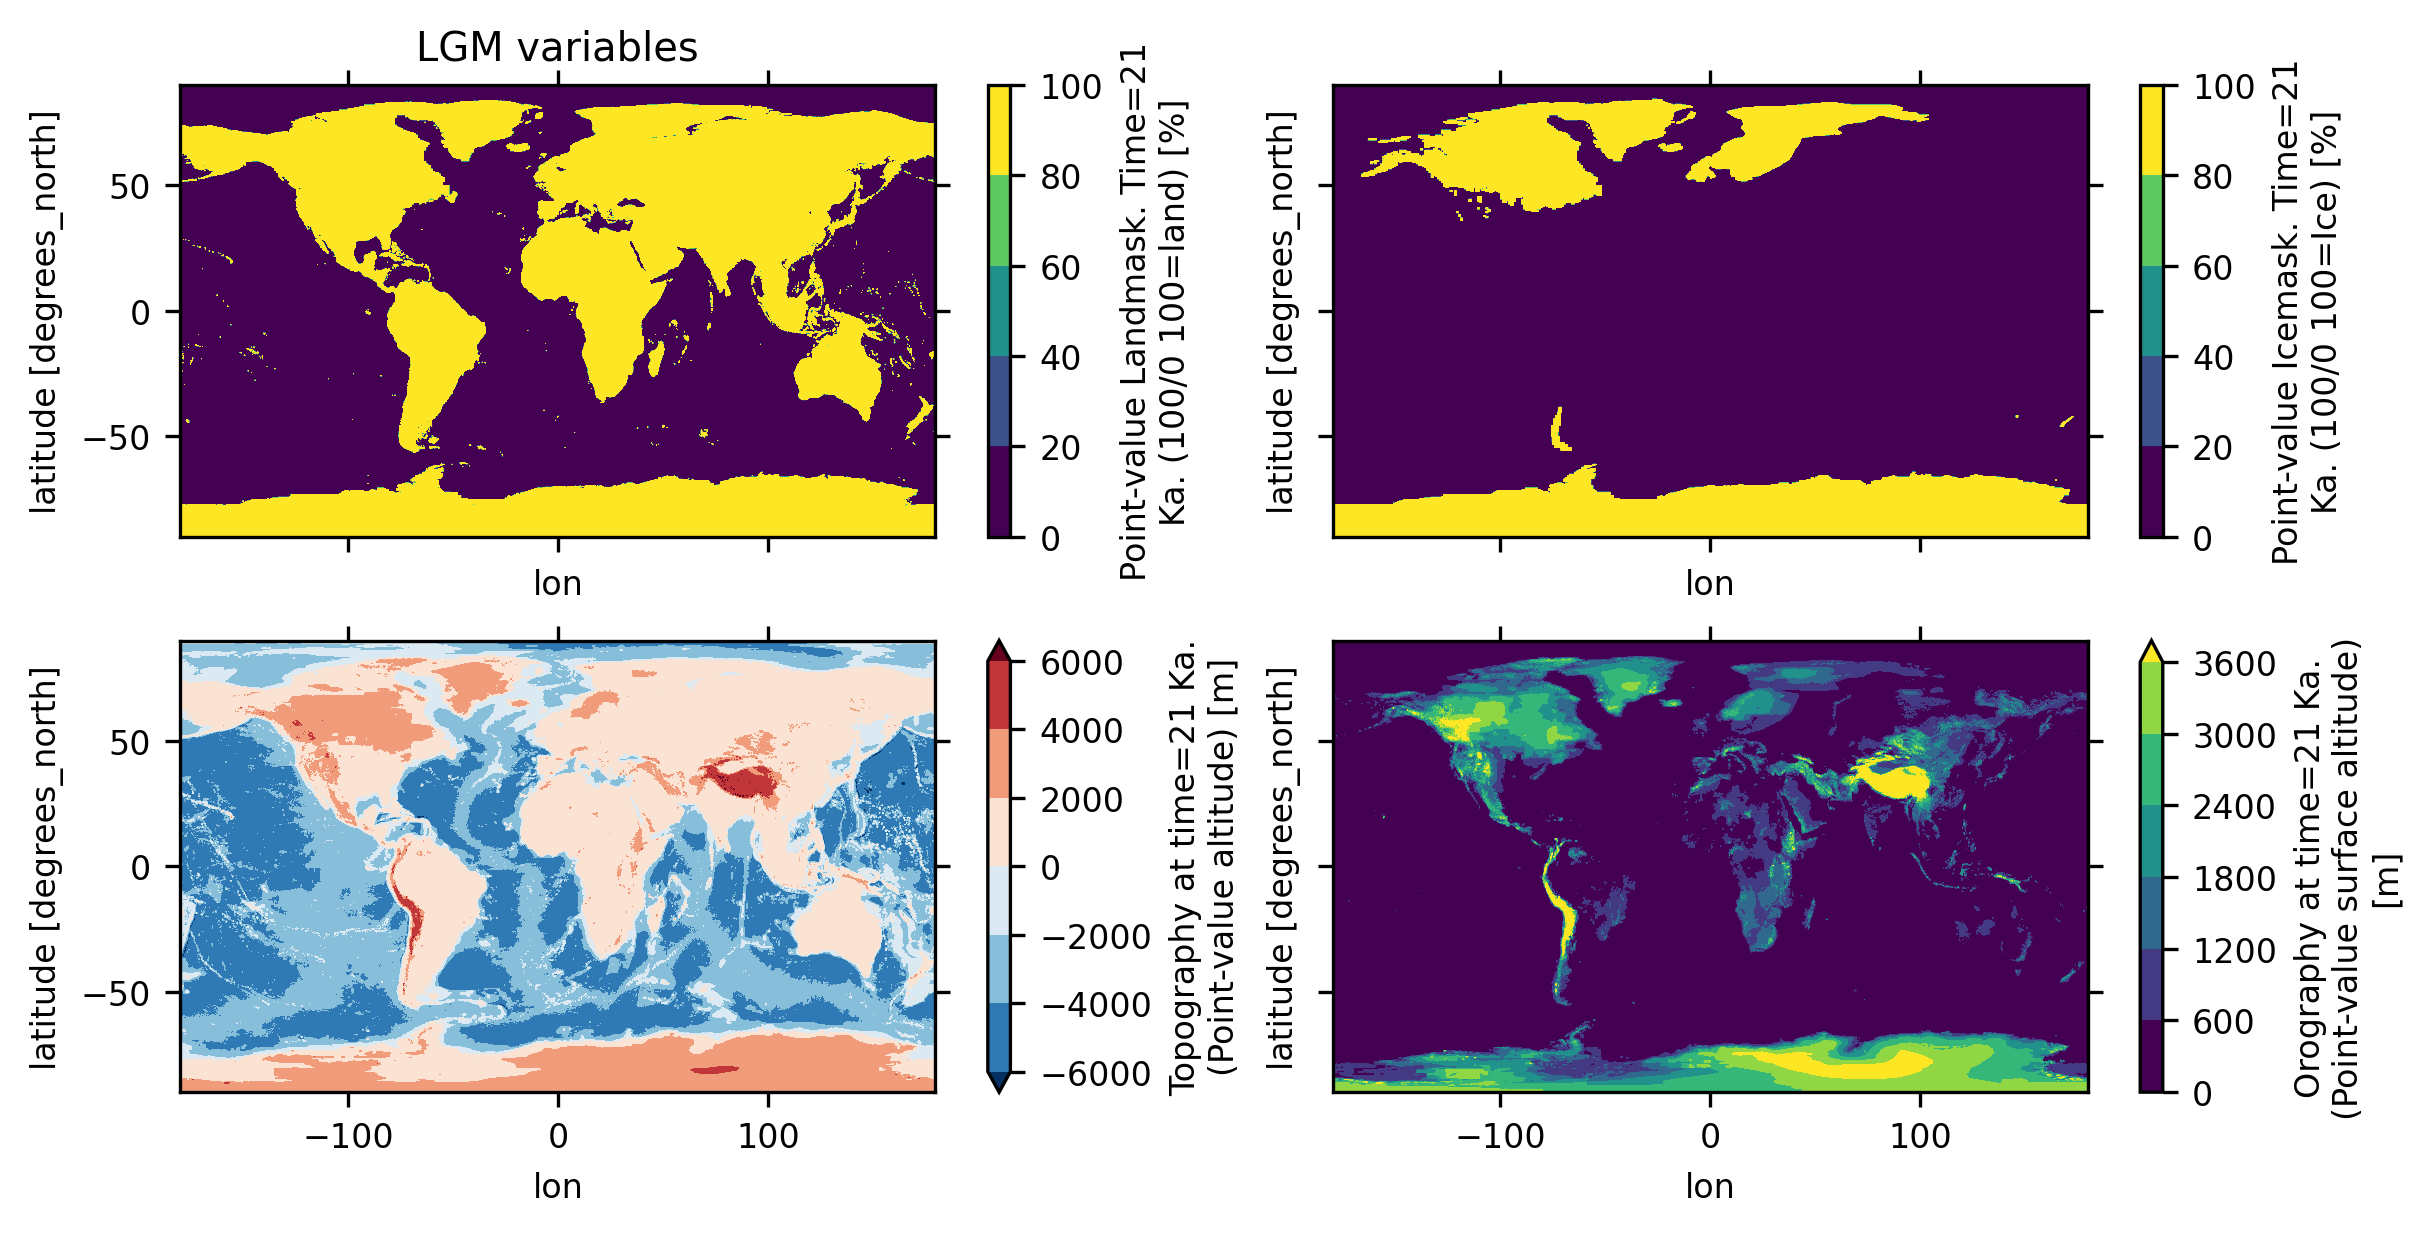

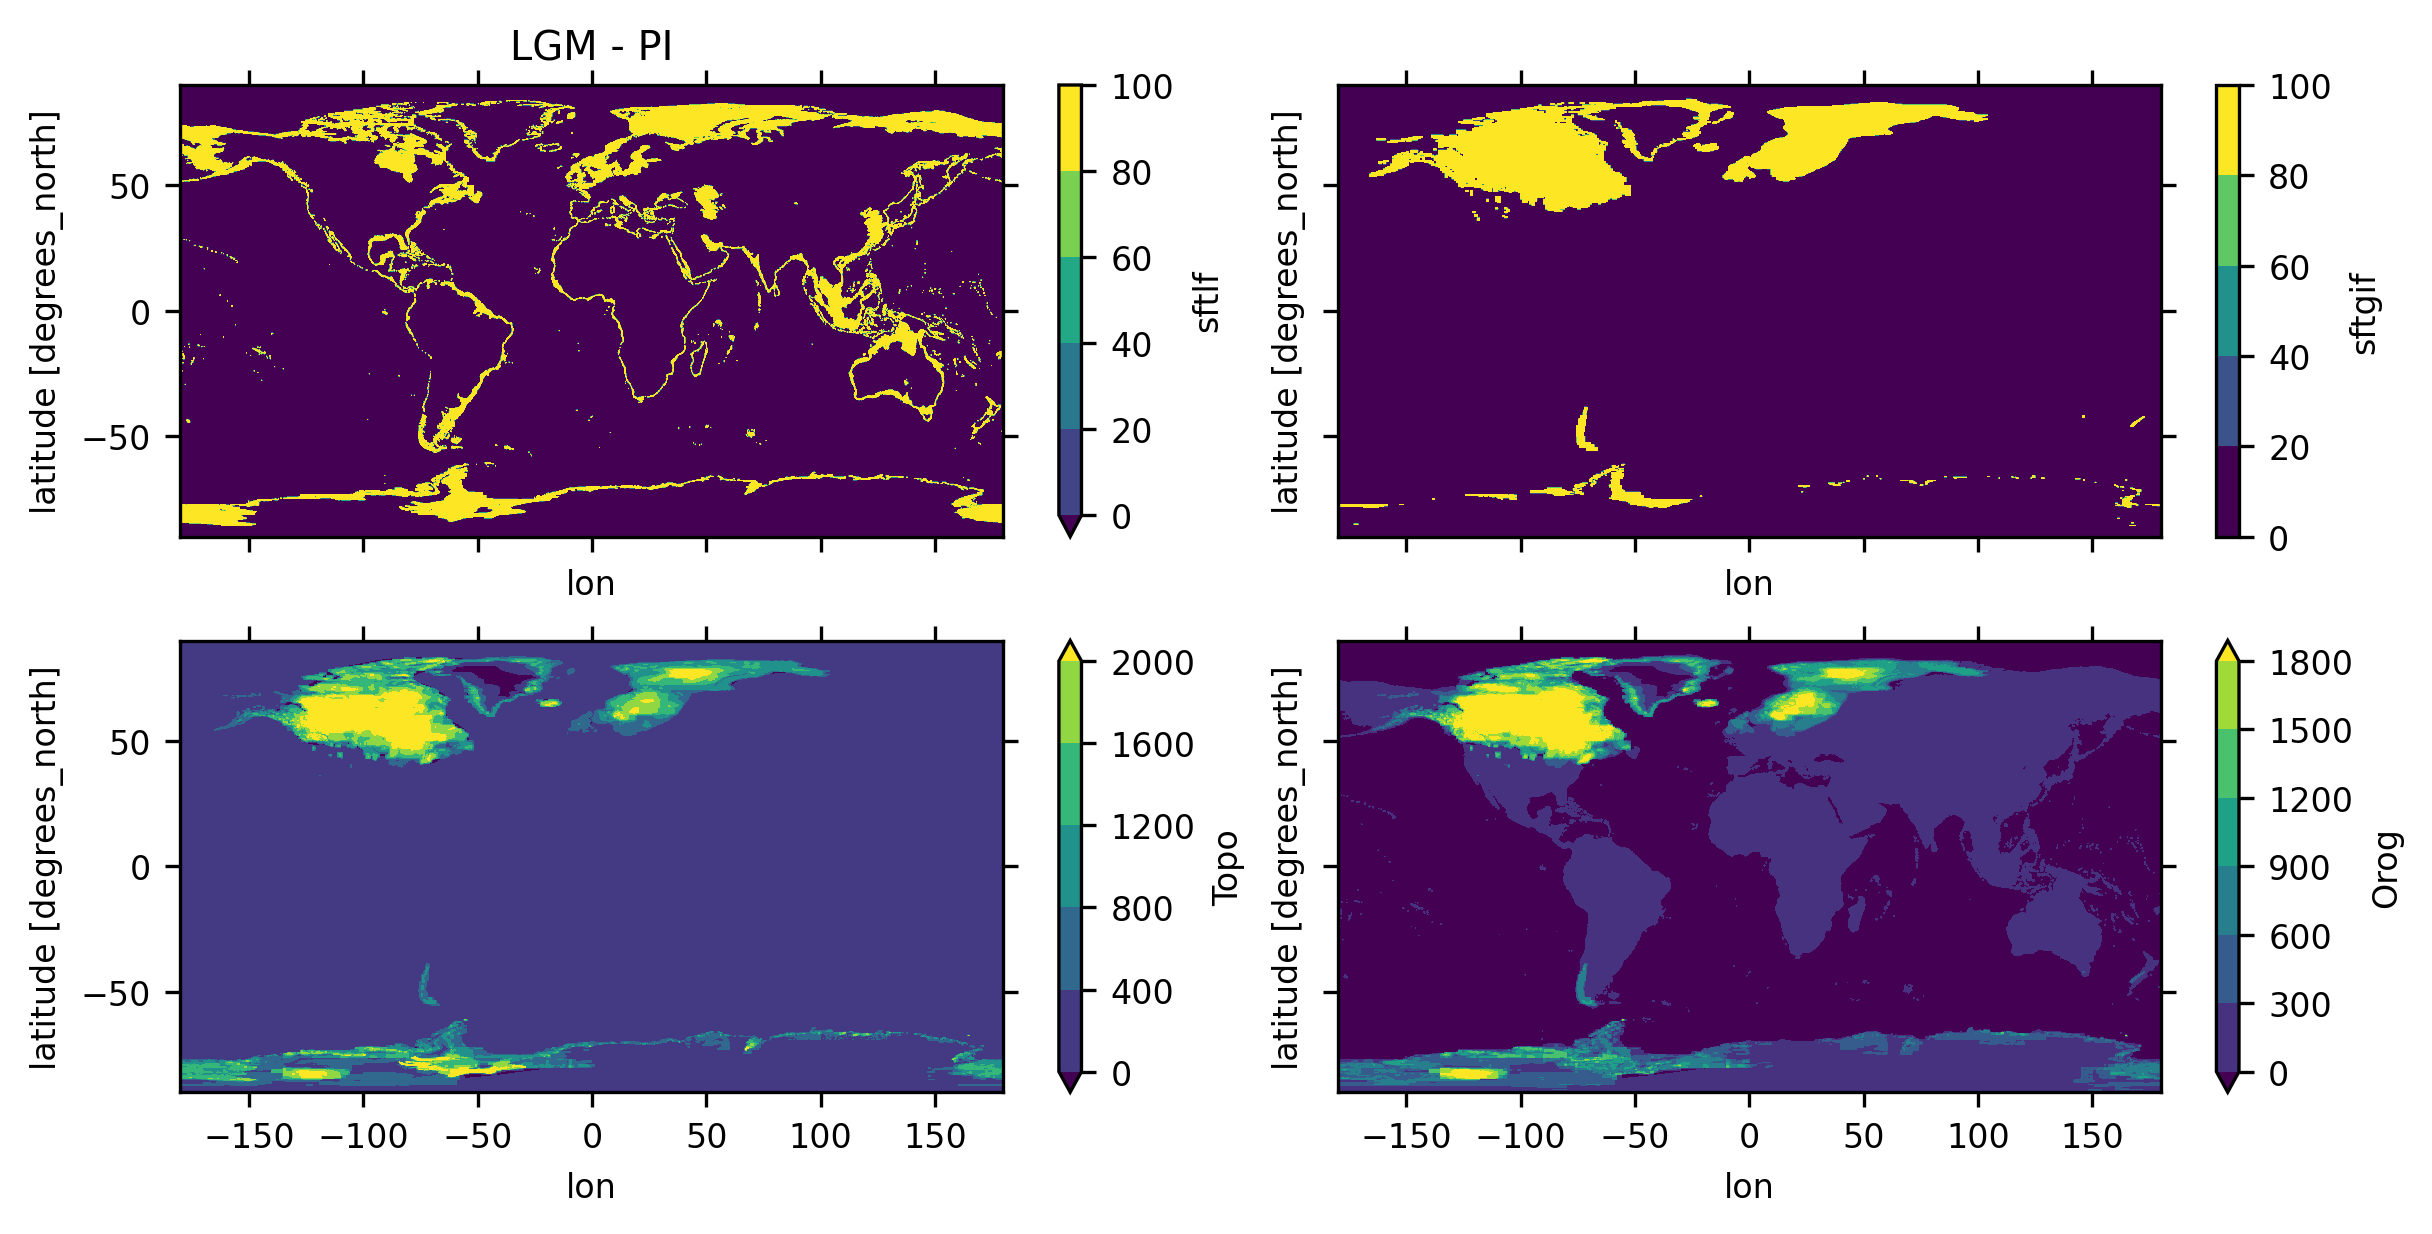

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4),
                         sharex=True, sharey=True,
                         constrained_layout=True)

for vname, ax in zip(['sftlf', 'sftgif', 'Topo', 'Orog'], axes.ravel()):
    ice6g_lgm_ds[vname].plot.contourf(ax=ax, robust=True)
axes[0, 0].set_title('LGM variables')

fig, axes = plt.subplots(2, 2, figsize=(8, 4),
                         sharex=True, sharey=True,
                         constrained_layout=True)

for vname, ax in zip(['sftlf', 'sftgif', 'Topo', 'Orog'], axes.ravel()):
    (ice6g_lgm_ds[vname]-ice6g_pre_ds[vname]).plot.contourf(ax=ax, robust=True)
axes[0, 0].set_title('LGM - PI')

### Read preindustrial topo in high res.

In [10]:
gmted_ds = xr.open_dataset(gmted)
gmted_ds_new = gmted_ds.copy(deep=True)

gmted_ds

<xarray.Dataset>
Dimensions:    (lon: 43200, lat: 21600)
Coordinates:
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 -90.0 -89.99 -89.98 -89.97 ... 89.98 89.99 90.0
Data variables:
    landfract  (lat, lon) float32 ...
    htopo      (lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 2.0.2 (https://mpimet.mpg....
    Conventions:    CF-1.6
    creation_data:  Wed May 18 09:18:44 MDT 2022
    history:        Wed May 18 09:29:23 2022: cdo merge gmted_bedmachine_stit...
    CDO:            Climate Data Operators version 2.0.1 (https://mpimet.mpg....

### Compute topo and land fraction anomalies & add them to the PI hires variables
- LGM land fraction increase includes shelf exposures and ice-sheet coverage
- Note: we wrap the variables in longitude to deal with extrapolation

In [11]:
%%time

topo_ano = ice6g_lgm_ds.Topo - ice6g_pre_ds.Topo
lndf_ano = np.maximum(ice6g_lgm_ds.sftlf - ice6g_pre_ds.sftlf, 0)
lndf_ano = np.minimum(lndf_ano + ice6g_lgm_ds.sftgif, 100)

topo_ano_wrapped = topo_ano.pad(lon=1, mode="wrap").assign_coords(
    lon=topo_ano.lon.pad(lon=1, mode="reflect", reflect_type="odd"))

lndf_ano_wrapped = lndf_ano.pad(lon=1, mode="wrap").assign_coords(
    lon=lndf_ano.lon.pad(lon=1, mode="reflect", reflect_type="odd"))

topo_ano_interp = topo_ano_wrapped.interp(lat=gmted_ds.lat, lon=gmted_ds.lon,
                                       method="linear",
                                       kwargs={'fill_value': 'extrapolate'})

lndf_ano_interp = lndf_ano_wrapped.interp(lat=gmted_ds.lat, lon=gmted_ds.lon,
                                       method="linear",
                                       kwargs={'fill_value': 'extrapolate'})

gmted_ds_new['htopo'] = gmted_ds['htopo'] + topo_ano_interp
gmted_ds_new['landfract'] = xr.where(gmted_ds['landfract'] + lndf_ano_interp/100 > 0.5, 1, 0)

gmted_ds_new.to_netcdf(gmted_lgm)

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'allowed-failures' has been deprecated; please use 'distributed.scheduler.allowed-failures' instead
  warnings.warn(


CPU times: user 41.3 s, sys: 26.7 s, total: 1min 7s
Wall time: 1min 22s


### Plot to check results

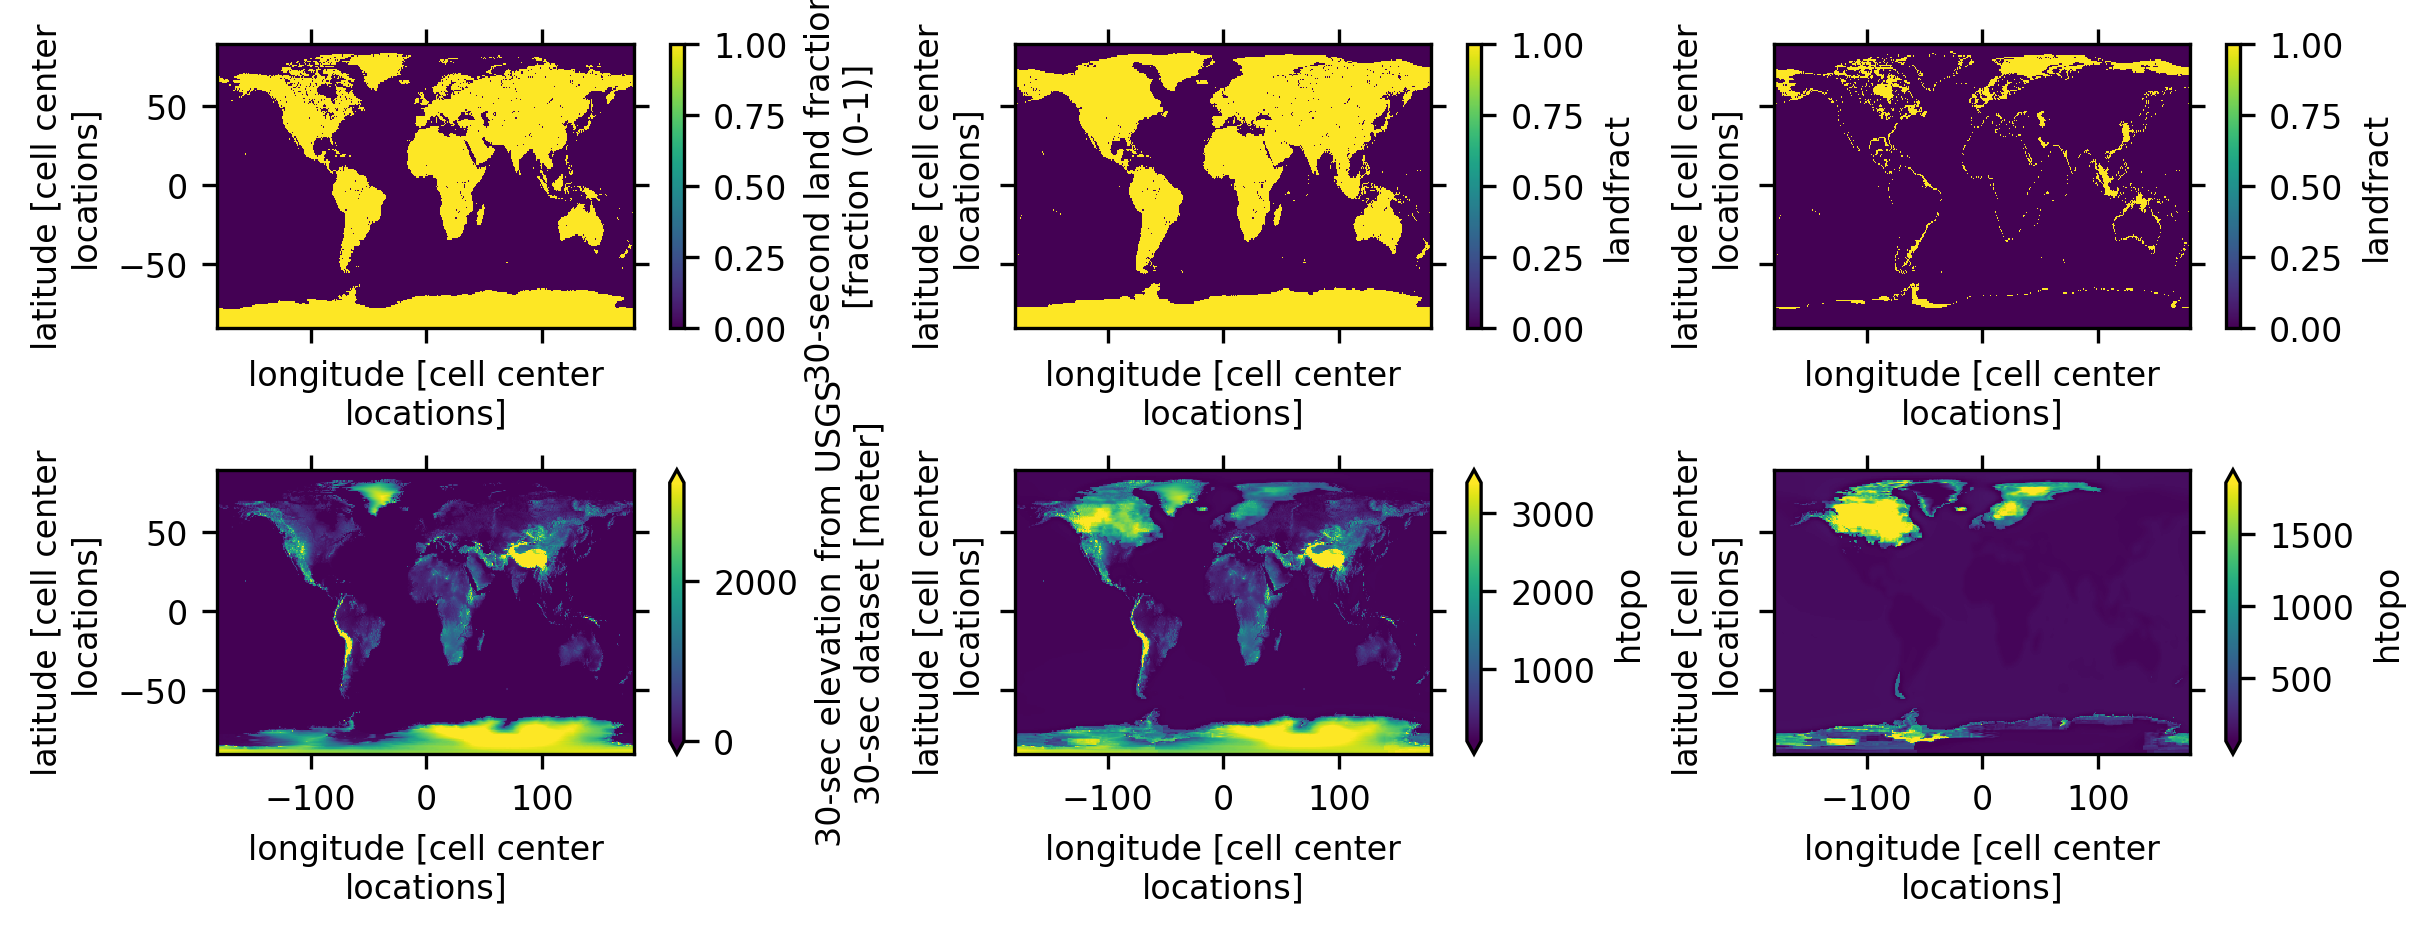

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(8, 3),
                         sharex=True, sharey=True,
                         constrained_layout=True)

for ds, ax in zip((gmted_ds, gmted_ds_new, gmted_ds_new - gmted_ds),
                  axes.ravel()[0:3]):
    ds.thin(100).landfract.plot(ax=ax, cmap='viridis', robust=True)

for ds, ax in zip((gmted_ds, gmted_ds_new, gmted_ds_new - gmted_ds),
                  axes.ravel()[3:]):
    ds.thin(100).htopo.plot(ax=ax, cmap='viridis', robust=True)

topo_ano.hvplot()

---
# Step 2: run NCAR Topo: bin_to_cube
- Input: gmted_lgm
- Output: `ncube3000_lgm`
- [Users' Guide](https://github.com/NCAR/Topo/wiki/User's-Guide)
- Note: we first create the namelist file and then use `qcmd` to run `bin_to_cube`

In [14]:
with open(f"{ncar_topo_dir}/bin_to_cube/bin_to_cube.nl", "w") as f:

    f.write('&binparams\n')
    f.write(f"  raw_latlon_data_file = '{gmted_lgm}'\n")
    f.write(f"  output_file = '{ncube3000_lgm}'\n")
    f.write(f"  ncube = 3000\n")
    f.write(f"/\n")

In [15]:
%%time

cmd = (f"cd {ncar_topo_dir}/bin_to_cube; "
       f"qcmd -l walltime=04:00:00 -A p93300324 -l select=1:ncpus=1:mem=200GB "
       f"./{bin_to_cube_exe}")
print(cmd)

subprocess.run(cmd, shell=True)

cd /glade/campaign/cgd/ppc/jiangzhu/setup_scripts/Topo/bin_to_cube; qcmd -l walltime=04:00:00 -A p93300324 -l select=1:ncpus=1:mem=200GB ./bin_to_cube_casper


/glade/u/apps/opt/pbstools/util/parse_opts: line 65: arg_dict[$arg_flag]: bad array subscript


Waiting on job launch; 1064167.casper-pbs with qsub arguments:
    qsub  -l select=1:ncpus=1:mem=200GB -A p93300324 -q casper@casper-pbs -l walltime=04:00:00

Thus no job control in this shell.
Intermediate cubed-sphere resolution         3000
Opening: /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/gmted2010_modis_bedmachine-rawdata-220518_21ka_20240520.nc
lon-lat dimensions:        43200       21600
min/max of 30sec land fraction    0    1
read terrain data
read lon
read lat
close file
done reading data from netCDF file
compute volume for raw data
consistency of lat-lon area   1.2016521111490874E-010
mean elevation (raw data)   408.59071456975408
read LANDM_COSLAT from file
lon-lat dimensions:          128          64
min/max of landm_coslat   0.0000000000000000        1.0000000000000000
read lon
read lat
close file
done reading in LANDM_COSLAT data from netCDF file
bin lat-lon data to cubed-sphere
min/max value of terr_cube:  -942.05675897084518        8356.4088528344128
min/ma

CompletedProcess(args='cd /glade/campaign/cgd/ppc/jiangzhu/setup_scripts/Topo/bin_to_cube; qcmd -l walltime=04:00:00 -A p93300324 -l select=1:ncpus=1:mem=200GB ./bin_to_cube_casper', returncode=0)

---
# Step 3: run NCAR Topo: cube_to_target
- Input: `ncube3000_lgm`
- Output: `topo_lgm`
- We wrtie a shell script and use `qcmd` to run `cube_to_target`
- We loop over multiple target grids if needed

In [16]:
%%time

script_file = f"{ncar_topo_dir}/cube_to_target/create_21ka_topo.csh"

with open(script_file, "w") as f:

    f.write('#!/bin/tcsh\n')

    for key in target_grids.keys():
        cmd = (f"{ncar_topo_dir}/cube_to_target/{cube_to_target_exe} "
               f"--grid_descriptor_file {target_grids[key]['scrip_file']} "
               f"--intermediate_cs_name {ncube3000_lgm} "
               f"--grid_descriptor_file_gll {target_grids[key]['scrip_file_gll']} "
               f"--output_grid {key} "
               f"--smoothing_scale {target_grids[key]['smoothing_scale']} "
               f"--output_data_directory {work_dir} "
               f"--source_data_identifier 'gmted2010_modis_bedmachine_ice6g_21ka' "
               f"--jmax_segments 20000 "
               f"--name_email_of_creator 'Jiang Zhu, jiangzhu@ucar.edu' \n")
        f.write(cmd)

cmd = (f"qcmd -l walltime=24:00:00 -A p93300324 -l select=1:ncpus=1:mem=200GB "
       f"-- source "
       f"{script_file}")
print(cmd)

subprocess.run(cmd, shell=True)

qcmd -l walltime=24:00:00 -A p93300324 -l select=1:ncpus=1:mem=200GB -- source /glade/campaign/cgd/ppc/jiangzhu/setup_scripts/Topo/cube_to_target/create_21ka_topo.csh
Waiting on job launch; 1064169.casper-pbs with qsub arguments:
    qsub  -l select=1:ncpus=1:mem=200GB -A p93300324 -q casper@casper-pbs -l walltime=24:00:00

Thus no job control in this shell.
No smoothed topo file specified

Namelist settings

smoothing_scale                 =    100.00000000000000
nwindow_halfwidth               =            0
ncube_sph_smooth_fine           =            0
grid_descriptor_fname           = /glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne30pg3_scrip_170417.nc
intermediate_cubed_sphere_fname = /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/gmted2010_modis_bedmachine-rawdata-220518_21ka_ncube3000_20240520.nc
output_grid                     = ne30pg3
luse_prefilter                  =  F
lfind_ridges                    =  T
rrfac_max                       =            1
lde

CompletedProcess(args='qcmd -l walltime=24:00:00 -A p93300324 -l select=1:ncpus=1:mem=200GB -- source /glade/campaign/cgd/ppc/jiangzhu/setup_scripts/Topo/cube_to_target/create_21ka_topo.csh', returncode=0)

---
# Step 4: replace sub-grid-scale variables over non-ice sheet and non-shelf regions with the PI values
- Input:  `topo_lgm`
- Output: `topo_lgm_replaced`
- The LGM forcing in sub-grid-scale variables would only be used above ice sheets or expanded shelves.

### Step 4.1: Map ice-6g files into the target grid
* We use `ncremap` to create a SCRIP grid file for ice-6g first
* We next use `ncremap` to regrid ice-6g files for both PI and LGM

In [17]:
%%time

ice6g_scrip_file = f"{work_dir}/I6_C.VM5a_10min.SCRIP.{today}.nc"
cmd = (f"ncremap -d {ice6g_pre} -g {ice6g_scrip_file}\n")
print(cmd)
subprocess.run(cmd, shell=True)

for key in target_grids.keys():
    cmd = (f"ncremap --thr_nbr=1 "
           f"-s {ice6g_scrip_file} "
           f"-g {target_grids[key]['scrip_file']} "
           f"{ice6g_lgm} {target_grids[key]['i6g_21ka_target']}\n")
    print(cmd)
    subprocess.run(cmd, shell=True)

    cmd = (f"ncremap --thr_nbr=1 "
           f"-s {ice6g_scrip_file} "
           f"-g {target_grids[key]['scrip_file']} "
           f"{ice6g_pre} {target_grids[key]['i6g_00ka_target']}\n")
    print(cmd)
    subprocess.run(cmd, shell=True)

ncremap -d /glade/campaign/cesm/development/palwg/raw_boundary_data/ice6g_10min/I6_C.VM5a_10min.0.nc -g /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/I6_C.VM5a_10min.SCRIP.20240520.nc

ncremap: INFO Both '-d dst_fl' and '-g grd_dst' were specified so ncremap will infer /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/I6_C.VM5a_10min.SCRIP.20240520.nc from /glade/campaign/cesm/development/palwg/raw_boundary_data/ice6g_10min/I6_C.VM5a_10min.0.nc
ncremap --thr_nbr=1 -s /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/I6_C.VM5a_10min.SCRIP.20240520.nc -g /glade/campaign/cesm/cesmdata/inputdata/share/scripgrids/ne30pg3_scrip_170417.nc /glade/campaign/cesm/development/palwg/raw_boundary_data/ice6g_10min/I6_C.VM5a_10min.21.nc /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/I6_C.VM5a_10min.21.ne30pg3_20240520.nc

Grid(src): /glade/campaign/cgd/ppc/jiangzhu/setup_data/cam_topo/I6_C.VM5a_10min.SCRIP.20240520.nc
Grid(dst): /glade/campaign/cesm/cesmdata/inputdata/share/scripgri

### Step 4.2 loop over multiple target grid and replace sub-grid-scale variables
- For simplicity, I am using $\Delta$Topo of 100 m and sftgif > 50% as a mask for *new* LGM glaciers

In [18]:
for key in target_grids.keys():

    target_grid = target_grids[key]

    ds_topo_pre = xr.open_dataset(target_grid['topo_pre'])
    ds_topo_lgm = xr.open_dataset(target_grid['topo_lgm'])

    ds_i6g_pre = xr.open_dataset(target_grid['i6g_00ka_target'])
    ds_i6g_lgm = xr.open_dataset(target_grid['i6g_21ka_target'])

    shelf_mask = xr.where((ds_i6g_lgm.sftlf > 50) &
                          (ds_i6g_pre.sftlf < 50), 1, 0)

    glaci_mask = xr.where((abs(ds_i6g_lgm.Topo - ds_i6g_pre.Topo) > 100.0) &
                          (ds_i6g_lgm.sftgif > 50), 1, 0)

    for vname in ds_topo_lgm.keys():
        if not re.search('PHIS|LANDFRAC|LANDM_COSLAT|area|lat|lon', vname):
            print(f"{vname:6s} substituted")
            data_dummy = xr.where((shelf_mask == 1) | (glaci_mask == 1),
                                  ds_topo_lgm[vname],
                                  ds_topo_pre[vname])
            ds_topo_lgm[vname].data = data_dummy.data.T

    ds_topo_lgm['lgm_exposed_shelves'] = shelf_mask.drop_vars(['lat', 'lon'])
    ds_topo_lgm['lgm_added_ice_sheets'] = glaci_mask.drop_vars(['lat', 'lon'])

    ds_topo_lgm.to_netcdf(target_grid['topo_lgm_replaced'])

SGH    substituted
SGH30  substituted
ISOVAR substituted
GBXAR  substituted
MXDIS  substituted
RISEQ  substituted
FALLQ  substituted
ANGLL  substituted
ANGLX  substituted
ANISO  substituted
ANIXY  substituted
HWDTH  substituted
CLNGT  substituted
SGH    substituted
SGH30  substituted
ISOVAR substituted
GBXAR  substituted
MXDIS  substituted
RISEQ  substituted
FALLQ  substituted
ANGLL  substituted
ANGLX  substituted
ANISO  substituted
ANIXY  substituted
HWDTH  substituted
CLNGT  substituted


In [19]:
for key in target_grids.keys():
    cmd = f"ncdiff -O {target_grids[key]['topo_lgm_replaced']} {target_grids[key]['topo_lgm']} {target_grids[key]['topo_lgm_diff_lgm']}"
    subprocess.run(cmd, shell=True)

    cmd = f"ncdiff -O {target_grids[key]['topo_lgm_replaced']} {target_grids[key]['topo_pre']} {target_grids[key]['topo_lgm_diff_pre']}"
    subprocess.run(cmd, shell=True)

# TODO: Use UXarray to examine the results (*_diff_*.nc)